## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(left=mouse_metadata, right=study_results, left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id_array = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice_id_array

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id_df=pd.DataFrame({'Mouse ID': duplicate_mice_id_array})
duplicate_mouse_id_df

,Mouse ID
0,g989


In [5]:
clean_mouse_df= combined_data.loc[combined_data['Mouse ID'].isin(duplicate_mice_id_array)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = clean_mouse_df['Mouse ID'].nunique()
number_of_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

multiple_series_statistics_summary = pd.DataFrame() 

drug_regimen_mean = clean_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().reset_index(name ='Mean')
drug_regimen_median = clean_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().reset_index(name ='Median')
drug_regimen_variance = clean_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().reset_index(name ='Variance')
drug_regimen_standard_deviation = clean_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().reset_index(name ='Standard Deviation')
drug_regimen_sem = clean_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().reset_index(name ='Sem')

multiple_series_statistics_summary = pd.merge(left=drug_regimen_mean, right=drug_regimen_median, left_on='Drug Regimen', right_on='Drug Regimen')
multiple_series_statistics_summary = pd.merge(left=multiple_series_statistics_summary, right=drug_regimen_variance, left_on='Drug Regimen', right_on='Drug Regimen')
multiple_series_statistics_summary = pd.merge(left=multiple_series_statistics_summary, right=drug_regimen_standard_deviation, left_on='Drug Regimen', right_on='Drug Regimen')
multiple_series_statistics_summary = pd.merge(left=multiple_series_statistics_summary, right=drug_regimen_sem, left_on='Drug Regimen', right_on='Drug Regimen')

multiple_series_statistics_summary

,Drug Regimen,Mean,Median,Variance,Standard Deviation,Sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_regimen_group_by = clean_mouse_df.groupby(['Drug Regimen'])
group_by_statistics_summary = drug_regimen_group_by.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
group_by_statistics_summary = group_by_statistics_summary.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'Sem'})

group_by_statistics_summary

,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

AttributeError: 'Rectangle' object has no property 'xlabel'

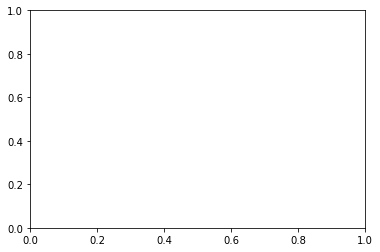

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

total_mice_for_each_treatment_pandas = clean_mouse_df.groupby(['Drug Regimen'])['Mouse ID'] .count().reset_index(name ='Number of Mice')
total_mice_for_each_treatment_pandas = total_mice_for_each_treatment_pandas.set_index(['Drug Regimen'])

total_mice_for_each_treatment_pandas_plot = total_mice_for_each_treatment_pandas.plot.bar(xlabel='Drug Regimen', ylabel='Number of Mice', title='Total number of Mice per treatment', legend=False)


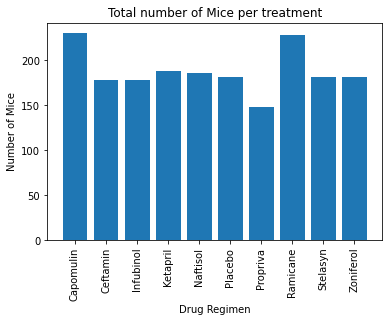

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

total_mice_for_each_treatment_pyplot = clean_mouse_df.groupby(['Drug Regimen'])['Mouse ID'] .count().reset_index(name ='Number of Mice')

plt.bar(total_mice_for_each_treatment_pyplot['Drug Regimen'].tolist(), total_mice_for_each_treatment_pyplot['Number of Mice'].tolist())
plt.xticks(total_mice_for_each_treatment_pyplot['Drug Regimen'].tolist(),  rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Total number of Mice per treatment')

plt.show()

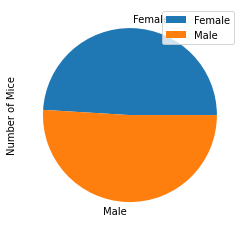

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pandas = clean_mouse_df.groupby(['Sex'])['Mouse ID'] .count().reset_index(name ='Number of Mice')
gender_pandas = gender_pandas.set_index(['Sex'])
gender_pandas_plot = gender_pandas.plot.pie(y='Number of Mice')

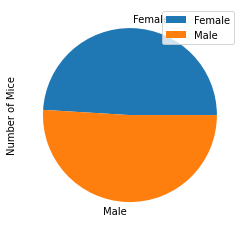

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = clean_mouse_df.groupby(['Sex'])['Mouse ID'] .count().reset_index(name ='Number of Mice')

plt.pie(gender_pyplot['Number of Mice'].tolist(), labels=gender_pyplot['Sex'].tolist())
plt.ylabel('Number of Mice')
plt.legend(gender_pyplot['Sex'].tolist())

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index(name ='Max Timepoint')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(left=clean_mouse_df, right=last_timepoint_df, left_on='Mouse ID', right_on='Mouse ID')
merge_df = merge_df[merge_df['Timepoint'] == merge_df['Max Timepoint']]

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

for treatment in treatments:
    temp = merge_df[merge_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    vol_data = temp.sum()
    tumor_vol_data.append([vol_data])
    
    quantile = temp.quantile([0.25,0.5,0.75])
    lower_quantile = quantile[0.25]
    upper_quantile = quantile[0.75]
    iqr = upper_quantile - lower_quantile
    lower_bound = lower_quantile - (1.5 * iqr)
    upper_bound = upper_quantile + (1.5 * iqr)
    
    print(f"{treatment}\n")
    print(f"The lower quantile of {treatment}: {lower_quantile}")
    print(f"The upper quantile of {treatment}: {upper_quantile}")
    print(f"The IQR of {treatment}: {iqr}")
    
    print(f"Values below {lower_bound} for {treatment} could be outliers.")
    print(f"Values above {upper_bound} for {treatment} could be outliers.")
    print("\n")
    

Capomulin

The lower quantile of Capomulin: 32.37735684
The upper quantile of Capomulin: 40.1592203
The IQR of Capomulin: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.


Ramicane

The lower quantile of Ramicane: 31.56046955
The upper quantile of Ramicane: 40.65900627
The IQR of Ramicane: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.


Infubinol

The lower quantile of Infubinol: 54.04860769
The upper quantile of Infubinol: 65.52574285
The IQR of Infubinol: 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.


Ceftamin

The lower quantile of Ceftamin: 48.72207785
The upper quantile of Ceftamin: 64.29983003
The IQR of Ceftamin: 15.577752179999997
Values below 25.355449580000002 for Ceftamin could be outliers.
Va

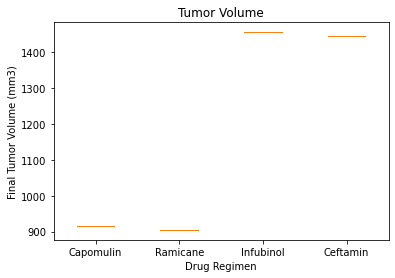

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data, labels=treatments)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Tumor Volume')

plt.show()

## Line and Scatter Plots

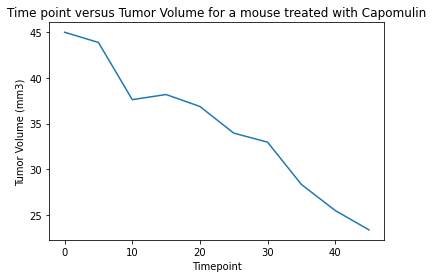

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

single_capomulin_mouse = capomulin_mouse[capomulin_mouse['Mouse ID'] == capomulin_mouse.iloc[0]['Mouse ID']]

plt.plot(single_capomulin_mouse['Timepoint'], single_capomulin_mouse['Tumor Volume (mm3)'])

plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Time point versus Tumor Volume for a mouse treated with Capomulin')

plt.show()

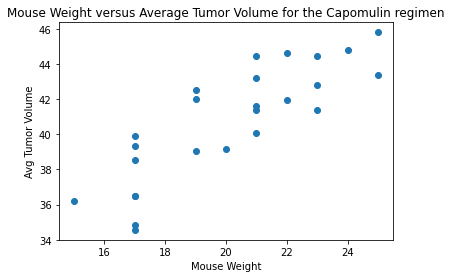

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = capomulin_mouse.groupby(['Mouse ID', 'Weight (g)']).mean().reset_index()

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

plt.ylabel('Avg Tumor Volume')
plt.xlabel('Mouse Weight')
plt.title('Mouse Weight versus Average Tumor Volume for the Capomulin regimen')

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_mouse = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_mouse.groupby(['Mouse ID', 'Weight (g)']).mean().reset_index()

correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
linear_regression = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

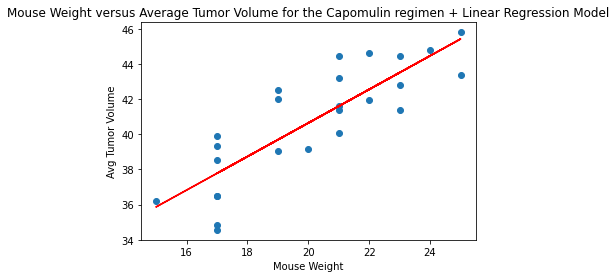

In [19]:
linerar_regress_values = avg_tumor_vol['Weight (g)'] * linear_regression.slope + linear_regression.intercept

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'],linerar_regress_values, 'r')

plt.ylabel('Avg Tumor Volume')
plt.xlabel('Mouse Weight')
plt.title('Mouse Weight versus Average Tumor Volume for the Capomulin regimen + Linear Regression Model')

plt.show()